In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/real-life-violence-situations-dataset/real life violence situations/Real Life Violence Dataset/NonViolence/NV_759.mp4
/kaggle/input/real-life-violence-situations-dataset/real life violence situations/Real Life Violence Dataset/NonViolence/NV_564.mp4
/kaggle/input/real-life-violence-situations-dataset/real life violence situations/Real Life Violence Dataset/NonViolence/NV_126.mp4
/kaggle/input/real-life-violence-situations-dataset/real life violence situations/Real Life Violence Dataset/NonViolence/NV_601.mp4
/kaggle/input/real-life-violence-situations-dataset/real life violence situations/Real Life Violence Dataset/NonViolence/NV_397.mp4
/kaggle/input/real-life-violence-situations-dataset/real life violence situations/Real Life Violence Dataset/NonViolence/NV_782.mp4
/kaggle/input/real-life-violence-situations-dataset/real life violence situations/Real Life Violence Dataset/NonViolence/NV_143.mp4
/kaggle/input/real-life-violence-situations-dataset/real life violence situa

In [2]:
import os
import shutil
import cv2
import math
import random
import numpy as np
import datetime as dt
import tensorflow 
import keras
from collections import deque
import matplotlib.pyplot as plt
plt.style.use("seaborn")
%matplotlib inline

from sklearn.model_selection import train_test_split
from keras.layers import *
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/tmp/ipykernel_4152/2405900891.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [3]:
from IPython.display import HTML
from base64 import b64encode
def Play_Video(filepath):
    html = ''
    video = open(filepath,'rb').read()
    src = 'data:video/mp4;base64,' + b64encode(video).decode()
    html += '<video width=640 muted controls autoplay loop><source src="%s" type="video/mp4"></video>' % src 
    return HTML(html)

In [4]:
NonViolnceVideos_Dir = "../input/real-life-violence-situations-dataset/Real Life Violence Dataset/NonViolence/"
ViolnceVideos_Dir = "../input/real-life-violence-situations-dataset/Real Life Violence Dataset/Violence/"
NonViolence_files_names_list = os.listdir(NonViolnceVideos_Dir)
Violence_files_names_list = os.listdir(ViolnceVideos_Dir)
Random_NonViolence_Video = random.choice(NonViolence_files_names_list)
Random_Violence_Video = random.choice(Violence_files_names_list)

In [5]:
Play_Video(f"{NonViolnceVideos_Dir}/{Random_NonViolence_Video}")

In [6]:
Play_Video(f"{ViolnceVideos_Dir}/{Random_Violence_Video}")

In [7]:
IMAGE_HEIGHT , IMAGE_WIDTH = 64, 64
SEQUENCE_LENGTH = 16
DATASET_DIR = "../input/real-life-violence-situations-dataset/Real Life Violence Dataset/"
CLASSES_LIST = ["NonViolence","Violence"]

In [8]:
def frames_extraction(video_path):
    frames_list = []
    video_reader = cv2.VideoCapture(video_path)
    video_frames_count = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))
    skip_frames_window = max(int(video_frames_count/SEQUENCE_LENGTH), 1)
    for frame_counter in range(SEQUENCE_LENGTH):
        video_reader.set(cv2.CAP_PROP_POS_FRAMES, frame_counter * skip_frames_window)
        success, frame = video_reader.read() 
 
        if not success:
            break
        resized_frame = cv2.resize(frame, (IMAGE_HEIGHT, IMAGE_WIDTH))
        normalized_frame = resized_frame / 255
        frames_list.append(normalized_frame)
        
    video_reader.release()
    return frames_list

In [9]:
def create_dataset():
 
    features = []
    labels = []
    video_files_paths = []
    for class_index, class_name in enumerate(CLASSES_LIST):
        
        print(f'Extracting Data of Class: {class_name}')
        files_list = os.listdir(os.path.join(DATASET_DIR, class_name))
        for file_name in files_list:
            video_file_path = os.path.join(DATASET_DIR, class_name, file_name)
            frames = frames_extraction(video_file_path)
            if len(frames) == SEQUENCE_LENGTH:
                features.append(frames)
                labels.append(class_index)
                video_files_paths.append(video_file_path)
 
    features = np.asarray(features)
    labels = np.array(labels)  

    return features, labels, video_files_paths

In [10]:
features, labels, video_files_paths = create_dataset()

Extracting Data of Class: NonViolence


[h264 @ 0x5cf0b43e4400] mb_type 104 in P slice too large at 98 31
[h264 @ 0x5cf0b43e4400] error while decoding MB 98 31
[h264 @ 0x5cf0b43e4400] mb_type 104 in P slice too large at 98 31
[h264 @ 0x5cf0b43e4400] error while decoding MB 98 31
[h264 @ 0x5cf0b43e4400] mb_type 104 in P slice too large at 98 31
[h264 @ 0x5cf0b43e4400] error while decoding MB 98 31


Extracting Data of Class: Violence


In [11]:
np.save("features.npy",features)
np.save("labels.npy",labels)
np.save("video_files_paths.npy",video_files_paths)

In [12]:
features, labels, video_files_paths = np.load("features.npy") , np.load("labels.npy") ,  np.load("video_files_paths.npy")

In [13]:
one_hot_encoded_labels = to_categorical(labels)

In [14]:
features_train, features_test, labels_train, labels_test = train_test_split(features, one_hot_encoded_labels, test_size = 0.1,
                                                                            shuffle = True, random_state = 42)

In [15]:
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.models import Sequential
from keras.layers import Input, GlobalAveragePooling2D, Dense, TimeDistributed, LSTM, Bidirectional, Dropout
base_model = MobileNetV2(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3), include_top=False, weights="imagenet")
base_model.trainable = False
model = Sequential()
model.add(TimeDistributed(base_model, input_shape=(SEQUENCE_LENGTH, IMAGE_HEIGHT, IMAGE_WIDTH, 3)))
model.add(TimeDistributed(GlobalAveragePooling2D()))
model.add(Bidirectional(LSTM(units=32, return_sequences=True)))
model.add(Dropout(0.25))
model.add(Bidirectional(LSTM(units=32, return_sequences=False)))
model.add(Dropout(0.25))
model.add(Dense(len(CLASSES_LIST), activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 16, 2, 2, 1280)   2257984   
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 16, 1280)         0         
 tributed)                                                       
                                                                 
 bidirectional (Bidirectiona  (None, 16, 64)           336128    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 16, 64)            0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               24832     
 nal)                                                   

In [16]:
# Creating Early Stopping Callback to monitor the accuracy
early_stopping_callback = EarlyStopping(monitor = 'val_accuracy', patience = 10, restore_best_weights = True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                  factor=0.6,
                                                  patience=5,
                                                  min_lr=0.00005,
                                                  verbose=1)
model.compile(loss = 'categorical_crossentropy', optimizer = 'sgd', metrics = ["accuracy"])
model_history = model.fit(x = features_train, y = labels_train, epochs = 20, batch_size = 8 ,
                                             shuffle = True, validation_split = 0.2, callbacks = [early_stopping_callback,reduce_lr])

Epoch 1/20
180/180 [==============================] - 27s 49ms/step - loss: 0.6303 - accuracy: 0.6556 - val_loss: 0.5197 - val_accuracy: 0.7611 - lr: 0.0100
Epoch 2/20
180/180 [==============================] - 5s 30ms/step - loss: 0.4800 - accuracy: 0.7910 - val_loss: 0.3916 - val_accuracy: 0.8222 - lr: 0.0100
Epoch 3/20
180/180 [==============================] - 5s 25ms/step - loss: 0.3558 - accuracy: 0.8500 - val_loss: 0.3216 - val_accuracy: 0.8667 - lr: 0.0100
Epoch 4/20
180/180 [==============================] - 5s 26ms/step - loss: 0.2723 - accuracy: 0.8875 - val_loss: 0.3004 - val_accuracy: 0.8722 - lr: 0.0100
Epoch 5/20
180/180 [==============================] - 5s 29ms/step - loss: 0.2021 - accuracy: 0.9236 - val_loss: 0.3001 - val_accuracy: 0.8778 - lr: 0.0100
Epoch 6/20
180/180 [==============================] - 5s 25ms/step - loss: 0.1471 - accuracy: 0.9563 - val_loss: 0.2927 - val_accuracy: 0.8722 - lr: 0.0100
Epoch 7/20
180/180 [==============================] - 5s 28ms/s

In [17]:
model_evaluation_history = model.evaluate(features_test, labels_test)

7/7 [==============================] - 4s 63ms/step - loss: 0.2510 - accuracy: 0.9000


In [18]:
def plot_metric(model_training_history, metric_name_1, metric_name_2, plot_name):
    
    metric_value_1 = model_training_history.history[metric_name_1]
    metric_value_2 = model_training_history.history[metric_name_2]
    epochs = range(len(metric_value_1))
    plt.plot(epochs, metric_value_1, 'blue', label = metric_name_1)
    plt.plot(epochs, metric_value_2, 'orange', label = metric_name_2)
    plt.title(str(plot_name))
    plt.legend()

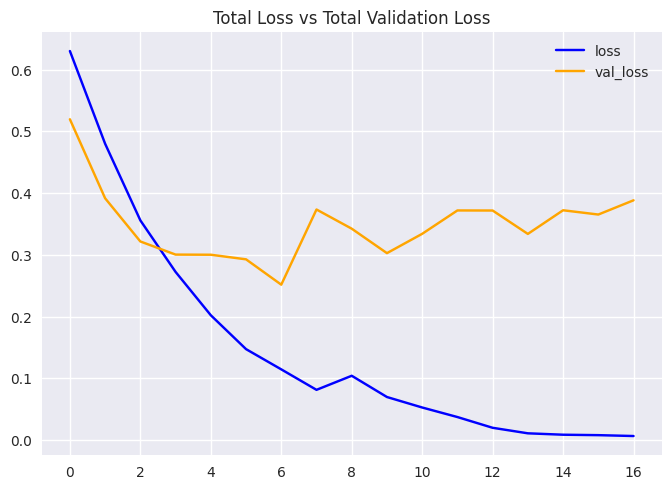

In [19]:
plot_metric(model_history, 'loss', 'val_loss', 'Total Loss vs Total Validation Loss')

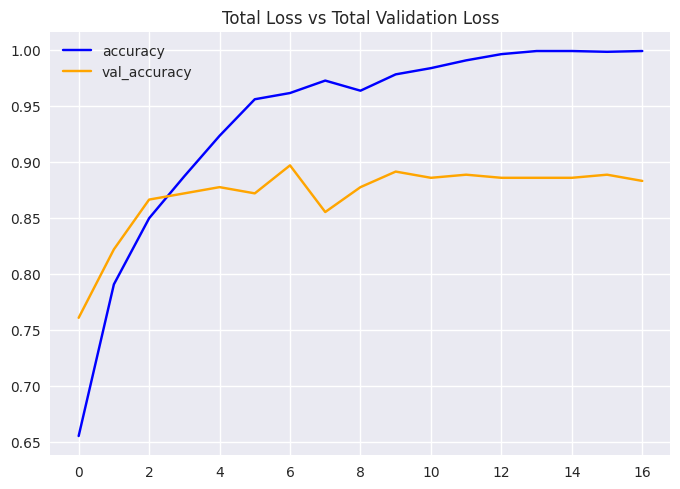

In [20]:
plot_metric(model_history, 'accuracy', 'val_accuracy', 'Total Loss vs Total Validation Loss')

In [21]:
labels_predict = model.predict(features_test)

7/7 [==============================] - 3s 64ms/step


In [22]:
labels_predict = np.argmax(labels_predict , axis=1)
labels_test_normal = np.argmax(labels_test , axis=1)
labels_test_normal.shape , labels_predict.shape

((200,), (200,))

In [23]:
from sklearn.metrics import accuracy_score
AccScore = accuracy_score(labels_predict, labels_test_normal)
print('Accuracy Score is : ', AccScore)

Accuracy Score is :  0.9


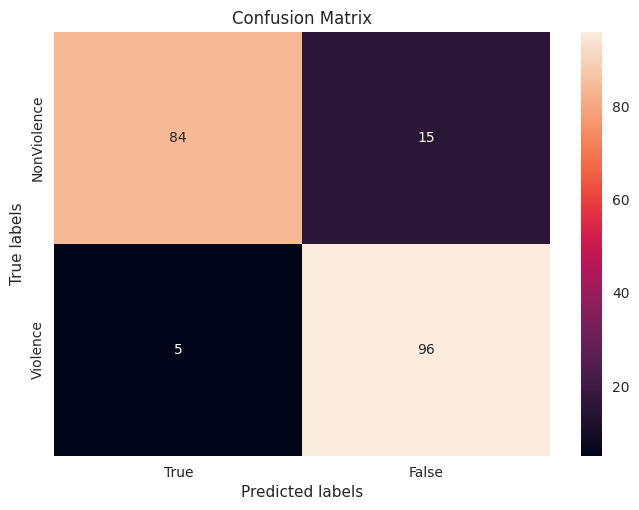

In [24]:
import seaborn as sns 
from sklearn.metrics import confusion_matrix

ax= plt.subplot()
cm=confusion_matrix(labels_test_normal, labels_predict)
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['True', 'False']); ax.yaxis.set_ticklabels(['NonViolence', 'Violence']);

In [25]:
from sklearn.metrics import classification_report

ClassificationReport = classification_report(labels_test_normal,labels_predict)
print('Classification Report of the model is : \n', ClassificationReport)

Classification Report of the model is : 
               precision    recall  f1-score   support

           0       0.94      0.85      0.89        99
           1       0.86      0.95      0.91       101

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200



In [26]:
def predict_frames(video_file_path, output_file_path, SEQUENCE_LENGTH):
    video_reader = cv2.VideoCapture(video_file_path)
    original_video_width = int(video_reader.get(cv2.CAP_PROP_FRAME_WIDTH))
    original_video_height = int(video_reader.get(cv2.CAP_PROP_FRAME_HEIGHT))
    video_writer = cv2.VideoWriter(output_file_path, cv2.VideoWriter_fourcc('m', 'p', '4', 'v'), 
                                    video_reader.get(cv2.CAP_PROP_FPS), (original_video_width, original_video_height))
    frames_queue = deque(maxlen = SEQUENCE_LENGTH)
    predicted_class_name = ''
    while video_reader.isOpened():
        ok, frame = video_reader.read() 
        
        if not ok:
            break
        resized_frame = cv2.resize(frame, (IMAGE_HEIGHT, IMAGE_WIDTH))
        normalized_frame = resized_frame / 255
        frames_queue.append(normalized_frame)
        if len(frames_queue) == SEQUENCE_LENGTH:                        
            predicted_labels_probabilities = model.predict(np.expand_dims(frames_queue, axis = 0))[0]
            predicted_label = np.argmax(predicted_labels_probabilities)
            predicted_class_name = CLASSES_LIST[predicted_label]
        if predicted_class_name == "Violence":
            cv2.putText(frame, predicted_class_name, (5, 100), cv2.FONT_HERSHEY_SIMPLEX, 3, (0, 0, 255), 12)
        else:
            cv2.putText(frame, predicted_class_name, (5, 100), cv2.FONT_HERSHEY_SIMPLEX, 3, (0, 255, 0), 12)
        video_writer.write(frame)                       
        
    video_reader.release()
    video_writer.release()

In [27]:
plt.style.use("default")
def show_pred_frames(pred_video_path): 

    plt.figure(figsize=(20,15))
    video_reader = cv2.VideoCapture(pred_video_path)
    frames_count = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))
    random_range = sorted(random.sample(range (SEQUENCE_LENGTH , frames_count ), 12))  
    for counter, random_index in enumerate(random_range, 1):
        plt.subplot(5, 4, counter)
        video_reader.set(cv2.CAP_PROP_POS_FRAMES, random_index)
        ok, frame = video_reader.read()
        if not ok:
          break 
        frame = cv2.cvtColor(frame , cv2.COLOR_BGR2RGB)
        plt.imshow(frame);ax.figure.set_size_inches(20,20);plt.tight_layout()               
    video_reader.release()

In [28]:
test_videos_directory = 'test_videos'
os.makedirs(test_videos_directory, exist_ok = True)
 
output_video_file_path = f'{test_videos_directory}/Output-Test-Video.mp4'

1/1 [==============================] - 0s 31ms/step


/tmp/ipykernel_4152/760348751.py:15: UserWarning: The figure layout has changed to tight
  plt.imshow(frame);ax.figure.set_size_inches(20,20);plt.tight_layout()


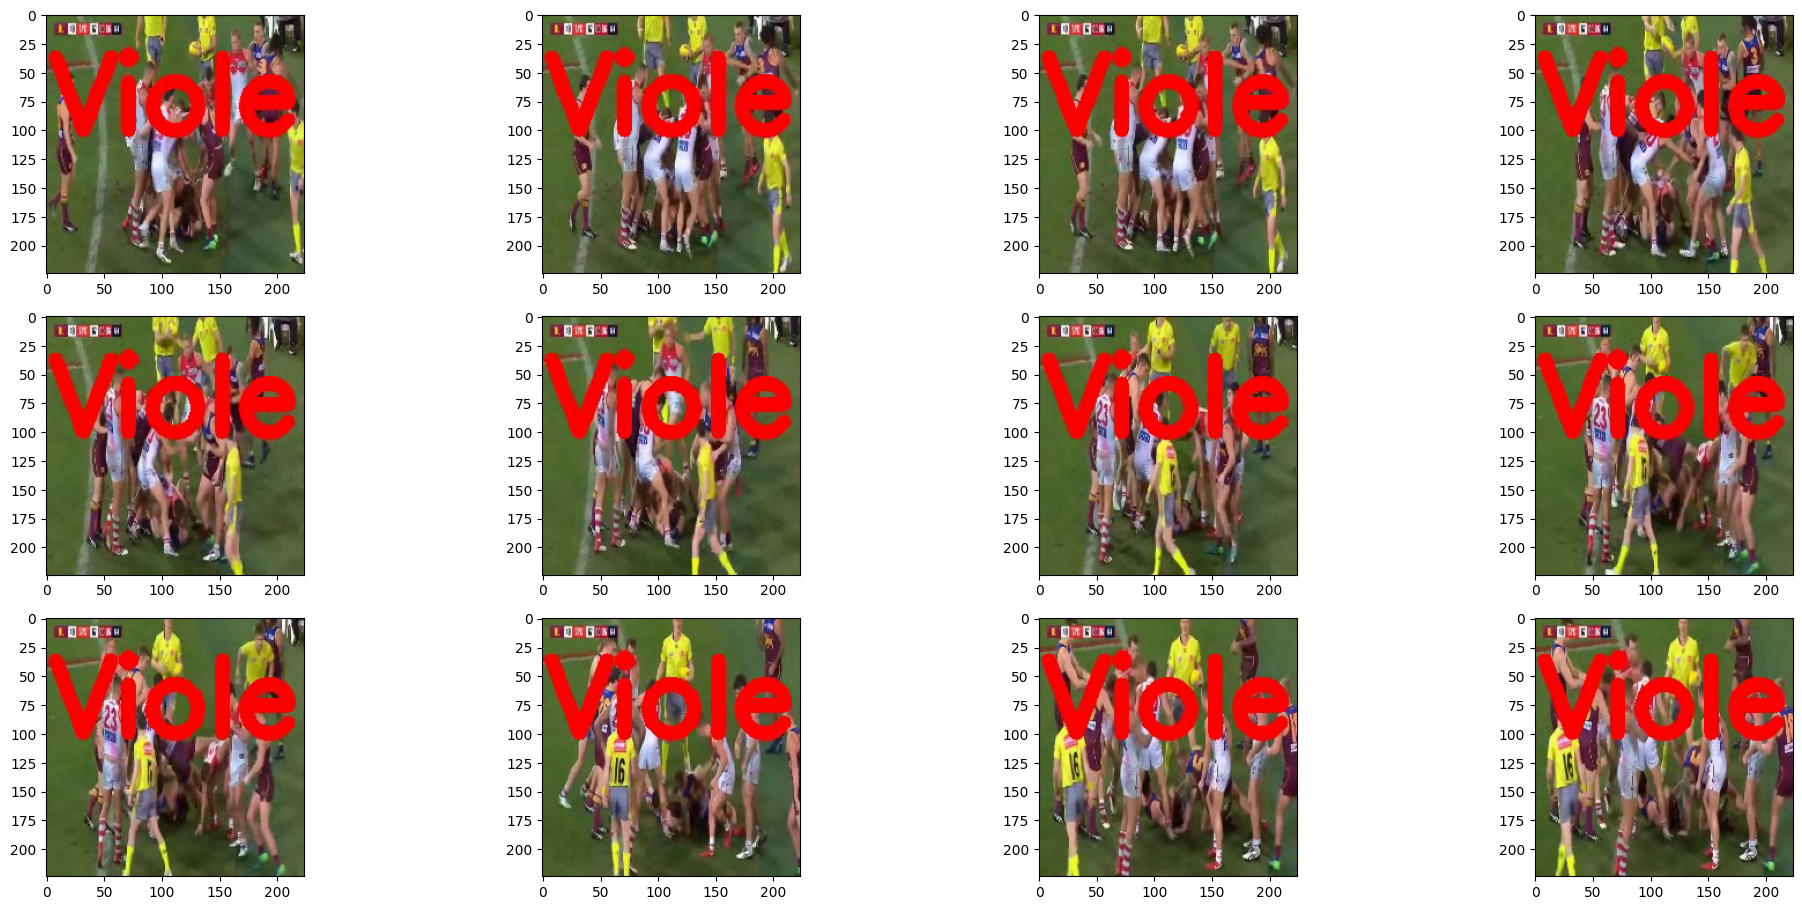

In [29]:
input_video_file_path = "../input/real-life-violence-situations-dataset/Real Life Violence Dataset/Violence/V_670.mp4"
predict_frames(input_video_file_path, output_video_file_path, SEQUENCE_LENGTH)
show_pred_frames(output_video_file_path)

In [30]:
Play_Video(input_video_file_path)

1/1 [==============================] - 0s 27ms/step


/tmp/ipykernel_4152/760348751.py:15: UserWarning: The figure layout has changed to tight
  plt.imshow(frame);ax.figure.set_size_inches(20,20);plt.tight_layout()


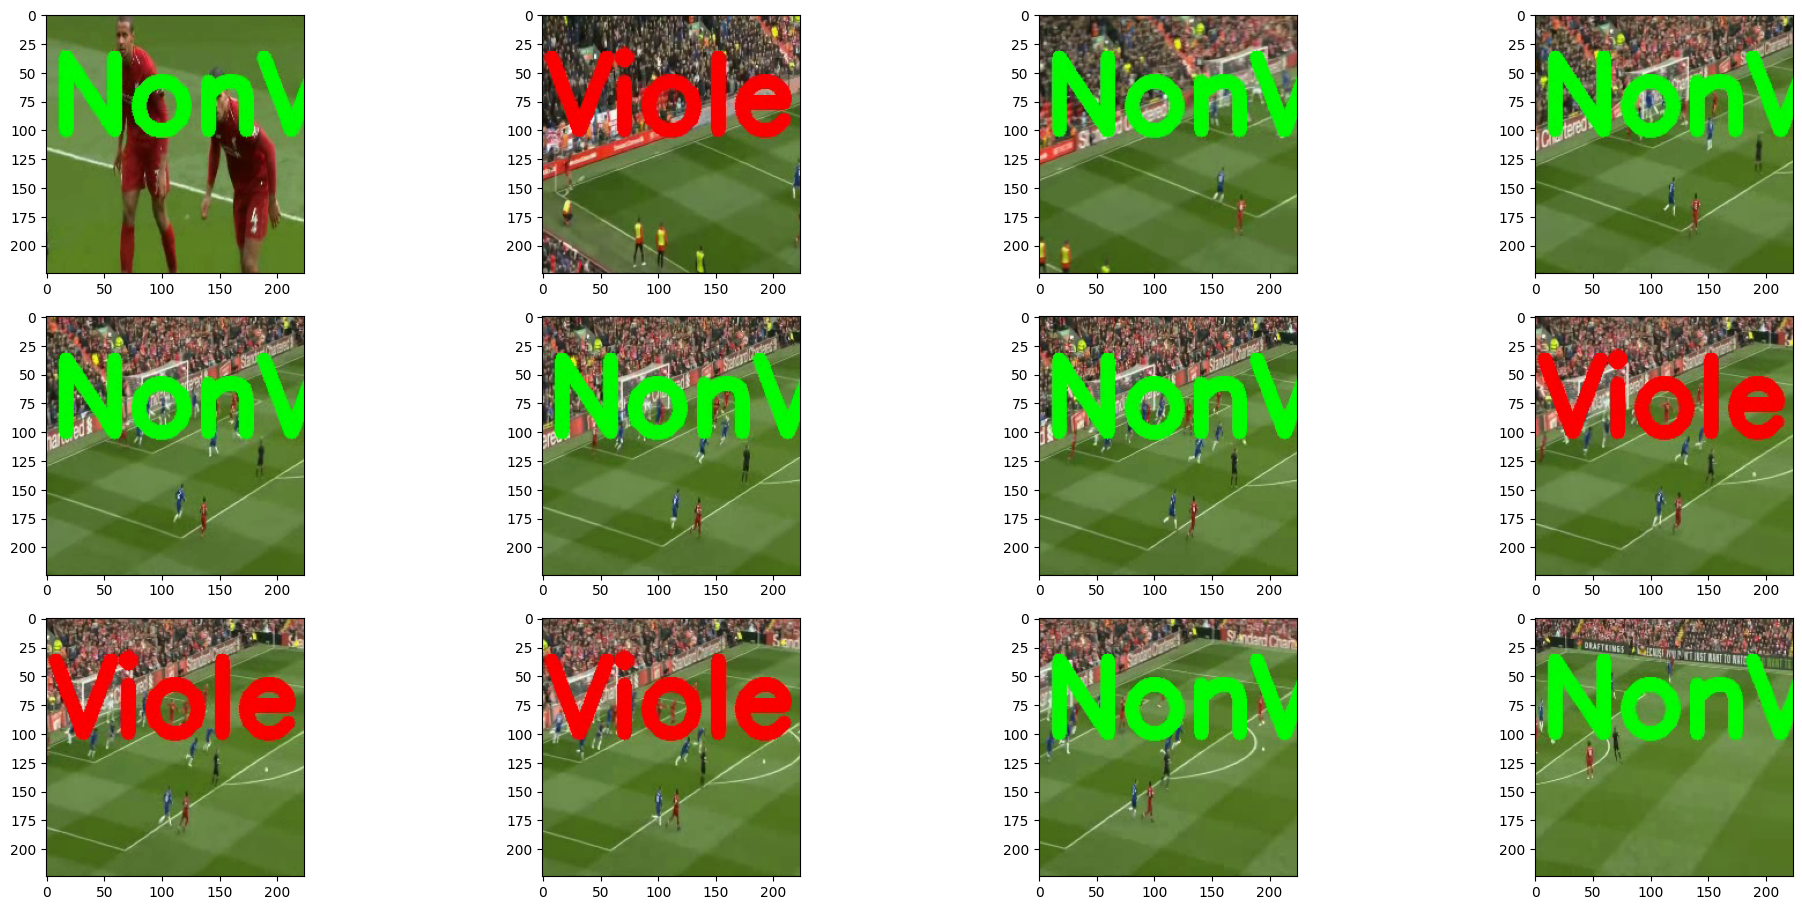

In [31]:
input_video_file_path = "../input/real-life-violence-situations-dataset/Real Life Violence Dataset/NonViolence/NV_102.mp4"
predict_frames(input_video_file_path, output_video_file_path, SEQUENCE_LENGTH)
show_pred_frames(output_video_file_path)

In [32]:
Play_Video(input_video_file_path)

In [33]:
def predict_video(video_file_path, SEQUENCE_LENGTH):
 
    video_reader = cv2.VideoCapture(video_file_path)
    original_video_width = int(video_reader.get(cv2.CAP_PROP_FRAME_WIDTH))
    original_video_height = int(video_reader.get(cv2.CAP_PROP_FRAME_HEIGHT))
    frames_list = []
    predicted_class_name = ''
    video_frames_count = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))
    skip_frames_window = max(int(video_frames_count/SEQUENCE_LENGTH),1)
    for frame_counter in range(SEQUENCE_LENGTH):
        video_reader.set(cv2.CAP_PROP_POS_FRAMES, frame_counter * skip_frames_window)
 
        success, frame = video_reader.read() 
 
        if not success:
            break
        resized_frame = cv2.resize(frame, (IMAGE_HEIGHT, IMAGE_WIDTH))
        normalized_frame = resized_frame / 255
        frames_list.append(normalized_frame)
    predicted_labels_probabilities = model.predict(np.expand_dims(frames_list, axis = 0))[0]
    predicted_label = np.argmax(predicted_labels_probabilities)
    predicted_class_name = CLASSES_LIST[predicted_label]
    print(f'Predicted: {predicted_class_name}\nConfidence: {predicted_labels_probabilities[predicted_label]}')
        
    video_reader.release()

In [34]:
import time
def time_predict_video(video_file_path, SEQUENCE_LENGTH):
    start_time = time.time()
    predict_video(video_file_path, SEQUENCE_LENGTH)
    end_time = time.time()
    inference_time = end_time - start_time
    return inference_time

input_video_file_path = "../input/real-life-violence-situations-dataset/Real Life Violence Dataset/Violence/V_230.mp4"
inference_time = time_predict_video(input_video_file_path, SEQUENCE_LENGTH)
print("Inference time for the video:", inference_time)
Play_Video(input_video_file_path)

1/1 [==============================] - 0s 28ms/step
Predicted: Violence
Confidence: 0.9767084717750549
Inference time for the video: 1.3764050006866455
